<a href="https://colab.research.google.com/github/fatuunreal/bk-capstone/blob/main/bk_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
!pip install imbalanced-learn

# 1 Import Library


In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# 2. EDA

##2.1 Membaca dan Menampilkan data

In [245]:
df = pd.read_csv('ObesityDataSet.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


## 2.2 Menampilkan informasi data

In [246]:
# Info umum dataset
print("\n👉 Informasi Dataset:")
print(df.info())


👉 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                       

## 2.3 Menampilkan Deskripsi Statistik

In [247]:
print("\n👉 Deskripsi Statistik:")
print(df.describe(include='all'))


👉 Deskripsi Statistik:
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             

##2.4 Cek Data

In [248]:
# Cek missing values
print("\n👉 Missing Values Tiap Kolom:")
print(df.isnull().sum())


👉 Missing Values Tiap Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


##2.5 Melihat Nilai unik tiap kolom

In [249]:
print("\n👉 Jumlah Nilai Unik Tiap Kolom:")
print(df.nunique())


👉 Jumlah Nilai Unik Tiap Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


2.6 Cek data duplikat

In [250]:
print("\n👉 Jumlah Data Duplikat:")
print(df.duplicated().sum())


👉 Jumlah Data Duplikat:
18


## 2.3. Visualisasi

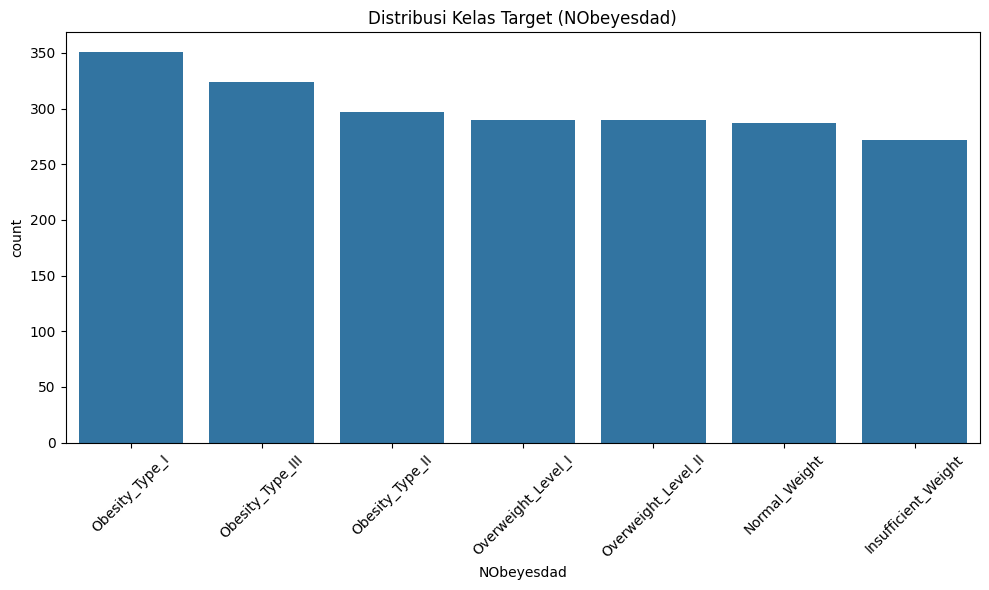

In [251]:
# Distribusi target
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target (NObeyesdad)")
plt.tight_layout()
plt.show()

In [252]:
# Konversi kolom numerik agar bisa dianalisis lebih lanjut
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

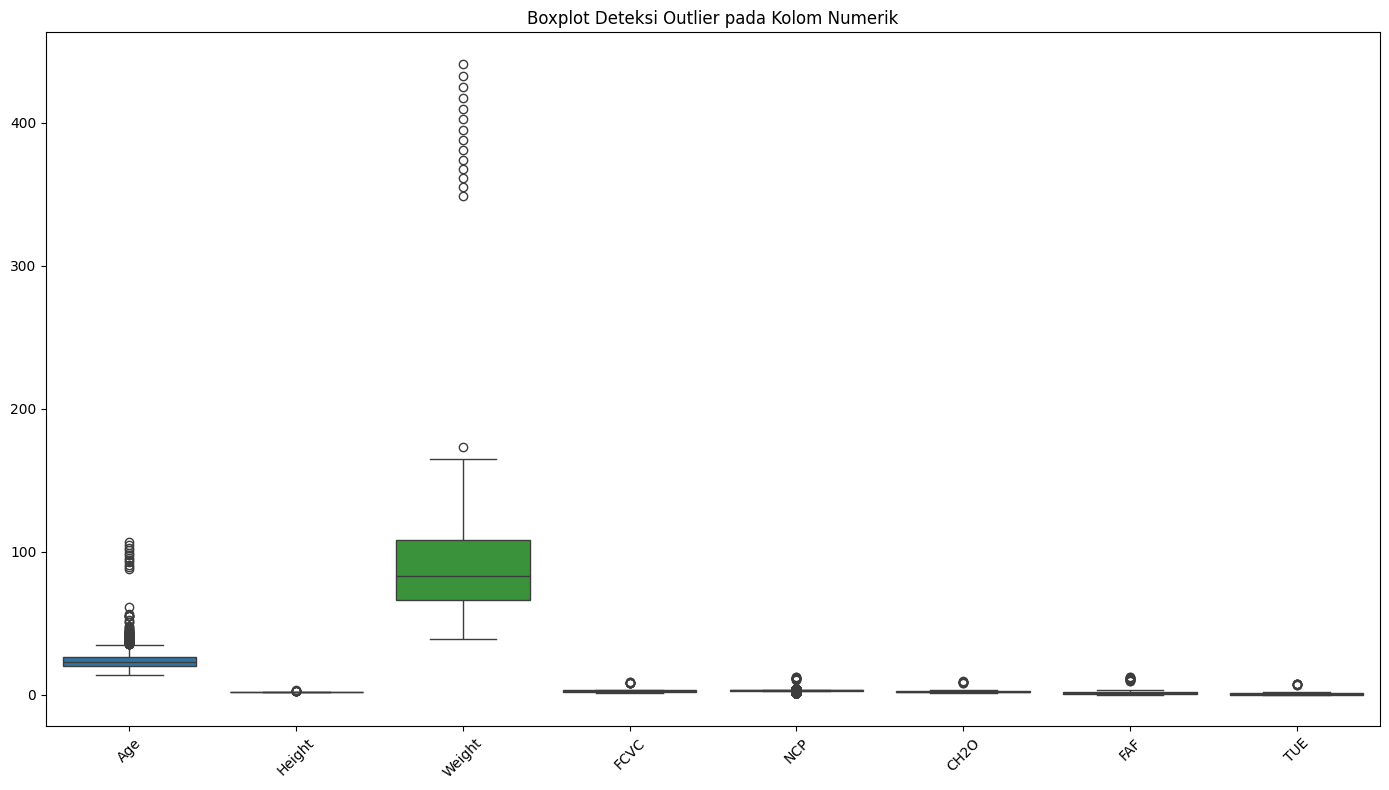

In [253]:
# Boxplot deteksi outlier
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot Deteksi Outlier pada Kolom Numerik")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

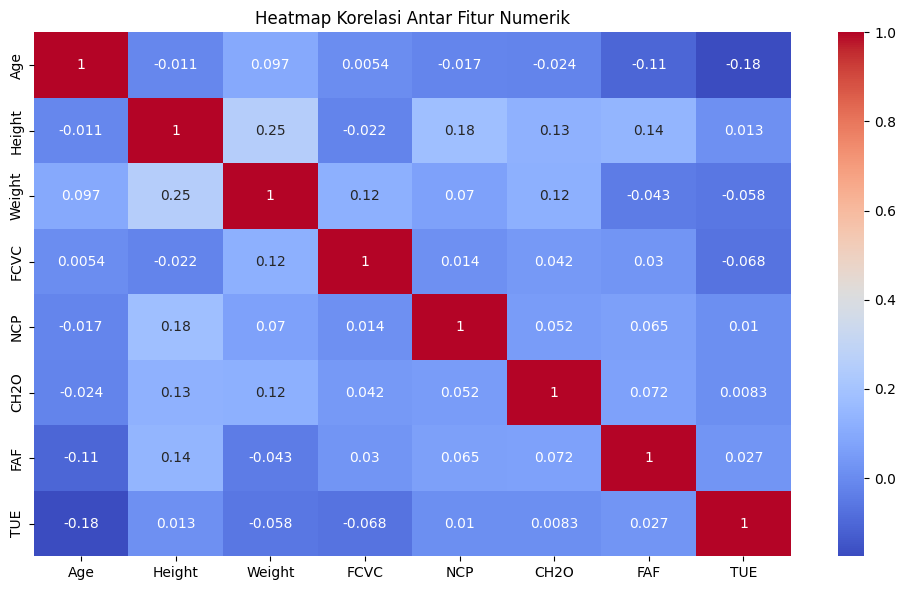

In [254]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()

##2.4. Kesimpulan EDA
KESIMPULAN EDA
1. Dataset terdiri dari {} baris dan {} kolom.
2. Semua fitur bertipe kategorikal atau numerik, tetapi beberapa numerik awalnya terbaca sebagai object.
3. Terdapat missing values di beberapa kolom, terutama fitur numerik.
4. Tidak ada data duplikat.
5. Distribusi target 'NObeyesdad' tidak seimbang — beberapa kelas jauh lebih dominan.
6. Terdapat outlier pada kolom numerik seperti Weight, Age, dan TUE.
7. Korelasi paling kuat antara fitur Height dan Weight (seperti yang diharapkan secara logis).



# 3. Preprocessing

## Penanganan Missing Value

In [255]:
# Imputasi: mean untuk numerik, modus untuk kategorikal
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing Values Setelah Penanganan:")
print(df.isnull().sum())


Missing Values Setelah Penanganan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-255-3544049371>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-255-3544049371>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

## Menghapus duplikasi

In [256]:
print("\nJumlah Data Duplikat Sebelum:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah Data Duplikat Setelah:", df.duplicated().sum())


Jumlah Data Duplikat Sebelum: 18
Jumlah Data Duplikat Setelah: 0


In [257]:
# 4. Tangani Outlier dengan Pemotongan Nilai (Clipping Method)

def clip_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].clip(lower=lower, upper=upper)
    return dataframe

print("\nJumlah Data Sebelum Clipping:", df.shape[0])

# Terapkan ke semua kolom numerik
for col in numerical_cols:
    df = clip_outliers_iqr(df, col)

print("Jumlah Data Setelah Clipping:", df.shape[0])



Jumlah Data Sebelum Clipping: 2093
Jumlah Data Setelah Clipping: 2093


In [258]:
# ================================
# 5. Tampilkan Dataset Bersih
# ================================
print("\nDataset bersih siap digunakan:")
print(df.head())
print("\nJumlah Baris dan Kolom:", df.shape)


Dataset bersih siap digunakan:
    Age  Gender  Height  Weight        CALC FAVC  FCVC      NCP  SCC SMOKE  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.00000   no    no   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.00000  yes   yes   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.00000   no    no   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.00000   no    no   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  2.31253   no    no   

   CH2O family_history_with_overweight  FAF  TUE       CAEC  \
0   2.0                            yes  0.0  1.0  Sometimes   
1   3.0                            yes  3.0  0.0  Sometimes   
2   2.0                            yes  2.0  1.0  Sometimes   
3   2.0                             no  2.0  0.0  Sometimes   
4   2.0                             no  0.0  0.0  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation

## Label Encoding

In [259]:
from sklearn.preprocessing import LabelEncoder
import pickle

# 1. ================== ENCODING UNTUK PELATIHAN ==================
df_encoded = df.copy()

# Encode target (label) untuk pelatihan model
le_target = LabelEncoder()
df_encoded["NObeyesdad"] = le_target.fit_transform(df["NObeyesdad"])

# Simpan mapping label (opsional untuk app.py)
label_mapping = dict(enumerate(le_target.classes_))
print("Label Mapping:", label_mapping)

# Encode fitur kategorikal
X_for_training = df_encoded.drop(columns=["NObeyesdad"])
categorical_cols = X_for_training.select_dtypes(include="object").columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])  # encode dari df asli

# Sekarang df_encoded sudah siap untuk training:
# X = df_encoded.drop(columns=["NObeyesdad"])
# y = df_encoded["NObeyesdad"]
# lalu split, scaling, model, dll...


# 2. ================== ENCODING UNTUK DISIMPAN (app.py) ==================
X = df.drop(columns=["NObeyesdad"])  # hanya fitur
categorical_cols = X.select_dtypes(include="object").columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(X[col])  # hanya fit saja, tidak transform
    label_encoders[col] = le

# Simpan encoder ke file
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Simpan label mapping juga kalau mau
with open("label_mapping.pkl", "wb") as f:
    pickle.dump(label_mapping, f)

print("✅ Encoder untuk app.py disimpan ke label_encoders.pkl")


Label Mapping: {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}
✅ Encoder untuk app.py disimpan ke label_encoders.pkl


In [260]:
# prompt: print hasil label encode NObeyes

print("\nHasil Label Encode NObeyesdad:")
print(df_encoded['NObeyesdad'].value_counts().sort_index())
print("\nMapping Label:")
label_mapping


Hasil Label Encode NObeyesdad:
NObeyesdad
0    270
1    285
2    351
3    297
4    324
5    276
6    290
Name: count, dtype: int64

Mapping Label:


{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II'}

## Seleksi Fitur

<ipython-input-261-481774838>:35: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


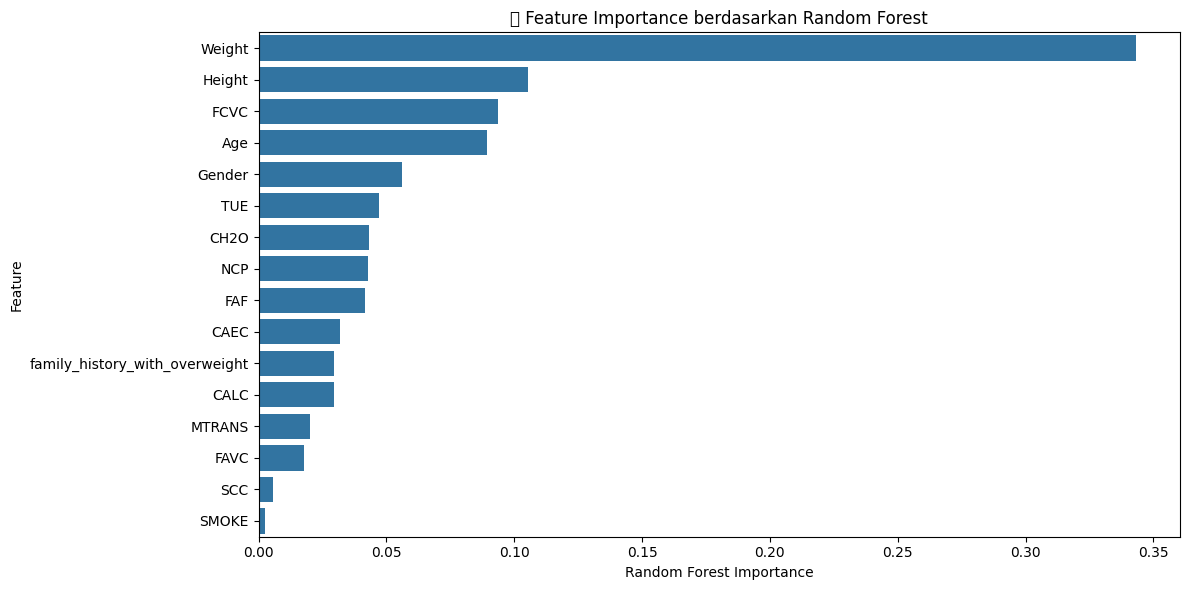

📊 Ranking Fitur Berdasarkan ANOVA dan Random Forest:
                           Feature  ANOVA F-Score  Random Forest Importance
0                           Weight    1176.757759                  0.343259
8                           Height      35.365562                  0.105520
3                             FCVC      98.070475                  0.093715
4                              Age      92.416436                  0.089399
1                           Gender     150.074373                  0.056142
14                             TUE       8.039866                  0.047003
13                            CH2O      14.646973                  0.043146
6                              NCP      36.584116                  0.042838
12                             FAF      17.604044                  0.041504
5                             CAEC      64.685809                  0.031920
2   family_history_with_overweight     129.889189                  0.029652
10                            CALC 

In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan target
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

# === 1. Feature Selection: ANOVA F-test ===
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
anova_scores = selector.scores_

# Tampilkan skor ANOVA
anova_df = pd.DataFrame({'Feature': X.columns, 'ANOVA F-Score': anova_scores})
anova_df = anova_df.sort_values(by='ANOVA F-Score', ascending=False)

# === 2. Feature Importance: Random Forest ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_importance = rf.feature_importances_

rf_df = pd.DataFrame({'Feature': X.columns, 'Random Forest Importance': rf_importance})
rf_df = rf_df.sort_values(by='Random Forest Importance', ascending=False)

# Gabungkan hasil
importance_df = pd.merge(anova_df, rf_df, on='Feature')
importance_df = importance_df.sort_values(by='Random Forest Importance', ascending=False)

# === 3. Visualisasi ===
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Random Forest Importance', y='Feature')
plt.title('🔍 Feature Importance berdasarkan Random Forest')
plt.tight_layout()
plt.show()

# Tampilkan tabel hasil
print("📊 Ranking Fitur Berdasarkan ANOVA dan Random Forest:")
print(importance_df)


## Mengatasi Ketidakseimbangan data dengan SMOTE

In [262]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

# Split data sebelum SMOTE agar hanya diterapkan di training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tampilkan distribusi awal
print("Distribusi Kelas Sebelum SMOTE:", Counter(y_train))

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi setelah SMOTE
print("Distribusi Kelas Setelah SMOTE:", Counter(y_train_resampled))


Distribusi Kelas Sebelum SMOTE: Counter({2: 281, 4: 259, 3: 237, 6: 232, 1: 228, 5: 221, 0: 216})
Distribusi Kelas Setelah SMOTE: Counter({2: 281, 6: 281, 5: 281, 3: 281, 4: 281, 1: 281, 0: 281})


## Normalisasi dan Standarisasi data

In [263]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Gunakan data hasil split
# (X_train, X_test, y_train, y_test dari split sebelumnya)

# Terapkan SMOTE hanya pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Buat scaler
scaler = StandardScaler()

# Fit dan transform pada training set (original, before SMOTE for scaling consistency)
X_train_scaled = scaler.fit_transform(X_train)

# Transform pada test set
X_test_scaled = scaler.transform(X_test)

# Konversi ke DataFrame agar mudah dianalisis (optional for scaling, but good for inspection)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


# Tampilkan contoh hasil SMOTE dan Standardisasi
print("✅ Data Training Setelah SMOTE:")
print(X_train_resampled.head())
print("\n✅ Target Training Setelah SMOTE:")
print(y_train_resampled.value_counts())
print("\n✅ Data Training Setelah Standarisasi (StandardScaler):")
print(X_train_scaled.head())
print("\n✅ Data Test Setelah Standarisasi (StandardScaler):")
print(X_test_scaled.head())

✅ Data Training Setelah SMOTE:
         Age  Gender    Height     Weight  CALC  FAVC      FCVC      NCP  SCC  \
0  35.030285       1  1.586301  80.000000     3     2  2.020502  2.31253    1   
1  18.178076       1  1.642892  82.144405     4     2  2.668890  3.00000    1   
2  24.347414       2  1.789193  89.393589     3     2  1.521604  2.31253    1   
3  34.000000       1  1.680000  75.000000     3     2  2.443519  2.31253    1   
4  21.808159       2  1.650000  80.000000     4     2  2.000000  3.00000    1   

   SMOKE      CH2O  family_history_with_overweight       FAF       TUE  CAEC  \
0      1  1.931420                               2  1.967973  0.000000     3   
1      1  1.172593                               2  0.886448  1.252677     3   
2      1  2.000000                               2  0.000000  0.632467     3   
3      1  1.000000                               1  0.000000  0.000000     3   
4      1  2.000000                               2  0.826609  2.000000     3   

 

Berikut adalah **kesimpulan dari tahap preprocessing dan eksplorasi lanjutan pada dataset prediksi obesitas**:

---

## 🧾 **Kesimpulan Proses Pra-Pemodelan**

### 1. ✅ **Penanganan Missing Values, Error Format, Duplikasi, dan Outlier**

* Nilai **yang hilang (missing)** diisi:

  * Rata-rata (`mean`) untuk kolom numerik,
  * Modus (`mode`) untuk kolom kategorikal/biner.
* **Error format** pada kolom numerik (yang awalnya terbaca sebagai string) dikonversi ke tipe numerik (`float`).
* Baris **duplikat** telah dihapus.
* **Outlier** pada kolom numerik diatasi menggunakan metode **IQR**, sehingga nilai-nilai ekstrem yang dapat mengganggu model telah dieliminasi.

---

### 2. 🔠 **Konversi Data Kategorikal ke Numerik**

* Semua fitur kategorikal seperti `Gender`, `FAVC`, `CAEC`, `MTRANS`, dan target `NObeyesdad` telah diubah menjadi format numerik menggunakan **Label Encoding**, agar bisa digunakan dalam algoritma machine learning.

---

### 3. 📊 **Evaluasi Pentingnya Fitur**

* Menggunakan analisis **ANOVA F-test** dan **feature importance dari Random Forest**, semua fitur memiliki kontribusi bervariasi.
* Namun **tidak ditemukan fitur yang benar-benar tidak relevan**, sehingga **semua fitur dipertahankan** untuk modeling awal.

---

### 4. ⚖️ **Penanganan Ketidakseimbangan Kelas**

* Dataset target `NObeyesdad` sangat tidak seimbang (didominasi oleh kelas tertentu).
* Diterapkan metode **SMOTE (Synthetic Minority Over-sampling Technique)** untuk **menyeimbangkan jumlah sampel** antar kelas, khususnya pada data training.

---

### 5. 📐 **Standarisasi Data**

* Dilakukan **standarisasi fitur numerik** menggunakan **StandardScaler** agar memiliki distribusi rata-rata 0 dan standar deviasi 1.
* Hal ini penting agar model yang sensitif terhadap skala fitur (seperti SVM dan KNN) bisa bekerja optimal.

---

## 🎯 **Kesimpulan Akhir**

Dengan semua langkah preprocessing ini, dataset kini:

* Bebas dari noise dan outlier besar,
* Tidak memiliki missing value atau duplikat,
* Siap digunakan dalam berbagai algoritma machine learning untuk klasifikasi tingkat obesitas (`NObeyesdad`) secara akurat dan efisien.

---

Kamu sekarang sudah bisa melanjutkan ke tahap **pelatihan dan evaluasi model klasifikasi** seperti Random Forest, SVM, atau XGBoost. Ingin saya bantu buatkan kode modelnya?


In [264]:
# Split fitur dan target
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [265]:
# Scaling
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [266]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [267]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
}


--- Evaluation Report for Random Forest (Default) ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.86      1.00      0.93        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.96      0.91      0.93        55
           6       0.96      0.93      0.95        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419


Confusion Matrix:
[[51  2  1  0  0  0  0]
 [ 0 57  0  0  0  0  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  1 59  0  0  0]
 [ 0  1  0  0 64  0  0]
 [ 0  5  0  0  0 50  0]
 [ 0  1  1  0  0  2 54]]


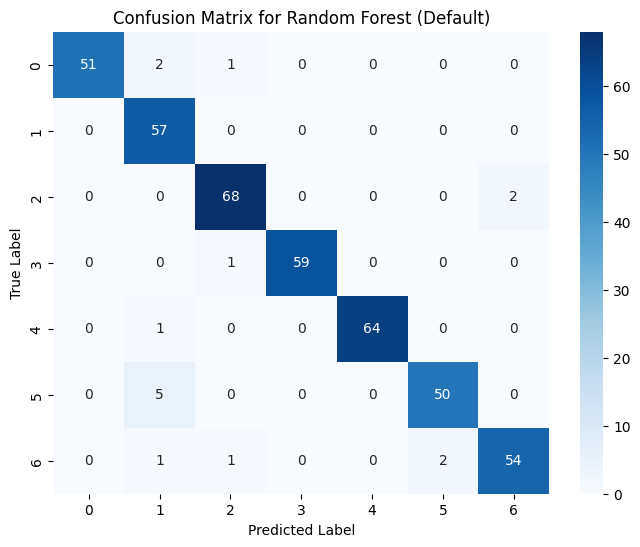


--- Evaluation Report for SVM (Default) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.96      0.79      0.87        57
           2       0.93      0.96      0.94        70
           3       0.93      0.93      0.93        60
           4       0.97      0.98      0.98        65
           5       0.75      0.84      0.79        55
           6       0.84      0.79      0.81        58

    accuracy                           0.90       419
   macro avg       0.90      0.89      0.89       419
weighted avg       0.90      0.90      0.90       419


Confusion Matrix:
[[52  1  0  1  0  0  0]
 [ 6 45  0  0  0  6  0]
 [ 0  0 67  1  0  0  2]
 [ 0  0  3 56  1  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  1  0  0  1 46  7]
 [ 0  0  2  1  0  9 46]]


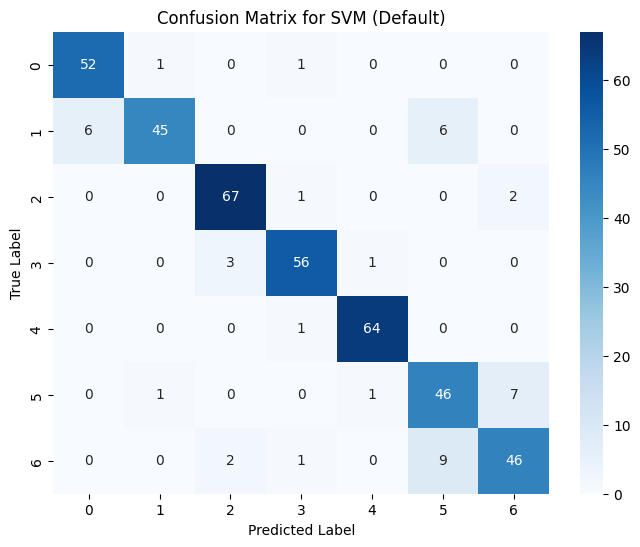

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Evaluation Report for Logistic Regression (Default) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        54
           1       0.76      0.61      0.68        57
           2       0.82      0.87      0.85        70
           3       0.87      0.90      0.89        60
           4       0.97      0.98      0.98        65
           5       0.66      0.71      0.68        55
           6       0.72      0.67      0.70        58

    accuracy                           0.81       419
   macro avg       0.81      0.81      0.81       419
weighted avg       0.81      0.81      0.81       419


Confusion Matrix:
[[49  4  0  1  0  0  0]
 [ 9 35  0  0  0 10  3]
 [ 0  0 61  3  0  2  4]
 [ 0  0  3 54  1  1  1]
 [ 0  0  0  1 64  0  0]
 [ 0  6  2  0  1 39  7]
 [ 0  1  8  3  0  7 39]]


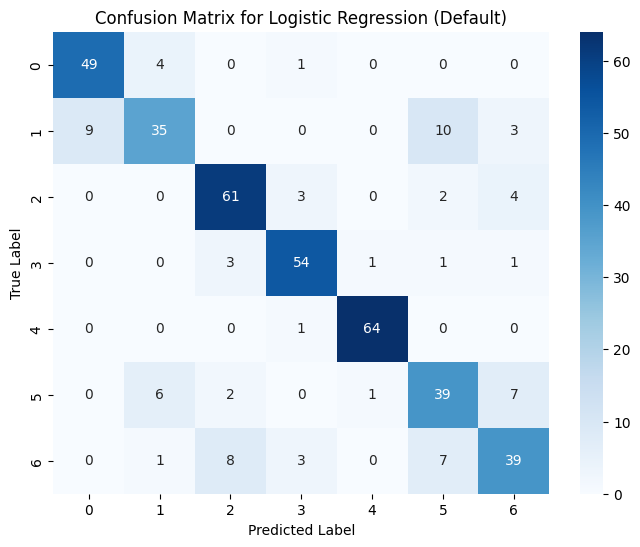

In [268]:
from time import time

# === RANDOM FOREST ===
rf_default = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time()
rf_default.fit(X_train, y_train)
end_time = time()
print("\n--- Evaluation Report for Random Forest (Default) ---")
y_pred = rf_default.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (Default)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# === SVM ===
svm_default = SVC(kernel='linear', random_state=42)
start_time = time()
svm_default.fit(X_train_scaled, y_train)
end_time = time()
print("\n--- Evaluation Report for SVM (Default) ---")
y_pred = svm_default.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM (Default)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# === LOGISTIC REGRESSION ===
logreg_default = LogisticRegression(max_iter=1000, random_state=42)
start_time = time()
logreg_default.fit(X_train_scaled, y_train)
end_time = time()
print("\n--- Evaluation Report for Logistic Regression (Default) ---")
y_pred = logreg_default.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression (Default)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [269]:
# prompt: panggil library cross_val_score

from sklearn.model_selection import cross_val_score

In [270]:
# prompt: panggil library GridSearchCV

from sklearn.model_selection import GridSearchCV

In [271]:
# === 3. Split & Scaling ===
X = df_encoded.drop(columns=["NObeyesdad"])
y = df_encoded["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [272]:
models_tuned = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 300],                  # ↓ dikurangi dari 5 → 2 opsi
            'max_depth': [None, 20],                     # ↓ dari 5 → 2 opsi
            'min_samples_split': [2, 5],                 # ↓ dari 3 → 2 opsi
            'min_samples_leaf': [1, 2],                  # ↓ dari 3 → 2 opsi
            'max_features': ['sqrt', 'log2'],            # ↓ dari 3 → 2 opsi
            'bootstrap': [True]                          # ↓ 1 opsi tetap (False dihilangkan)
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1.0, 10.0, 100.0],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
            'penalty': ['l2'],
            'class_weight': [None, 'balanced']
        }
    }
}



--- Evaluation Report for Random Forest (Tuned) ---
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.86      1.00      0.93        57
           2       0.96      0.96      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.93      0.91      0.92        55
           6       0.96      0.91      0.94        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419


Confusion Matrix:
[[51  2  1  0  0  0  0]
 [ 0 57  0  0  0  0  0]
 [ 0  0 67  0  0  1  2]
 [ 0  0  1 59  0  0  0]
 [ 0  1  0  0 64  0  0]
 [ 0  5  0  0  0 50  0]
 [ 0  1  1  0  

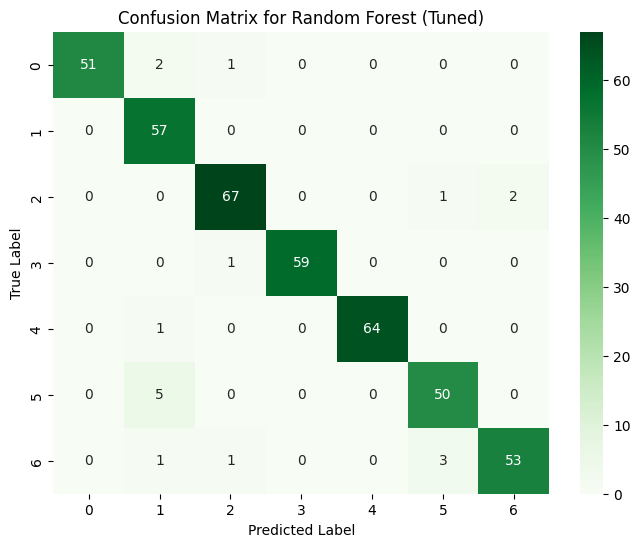


--- Evaluation Report for SVM (Tuned) ---
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.92      0.81      0.86        57
           2       0.92      0.97      0.94        70
           3       0.95      0.92      0.93        60
           4       0.96      0.98      0.97        65
           5       0.80      0.87      0.83        55
           6       0.90      0.81      0.85        58

    accuracy                           0.91       419
   macro avg       0.91      0.90      0.90       419
weighted avg       0.91      0.91      0.91       419


Confusion Matrix:
[[52  1  0  1  0  0  0]
 [ 6 46  0  0  0  5  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  4 55  1  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  2 48  3]
 [ 0  1  2  1  0  7 47]]


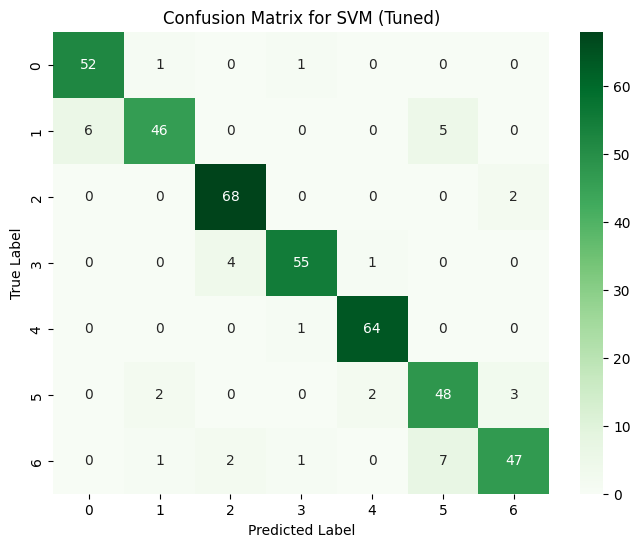

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



--- Evaluation Report for Logistic Regression (Tuned) ---
Best Parameters: {'C': 100.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.84      0.72      0.77        57
           2       0.89      0.91      0.90        70
           3       0.90      0.92      0.91        60
           4       0.97      0.98      0.98        65
           5       0.70      0.76      0.73        55
           6       0.78      0.72      0.75        58

    accuracy                           0.85       419
   macro avg       0.85      0.85      0.85       419
weighted avg       0.85      0.85      0.85       419


Confusion Matrix:
[[50  3  0  1  0  0  0]
 [ 7 41  0  0  0  9  0]
 [ 0  0 64  2  0  1  3]
 [ 0  0  3 55  1  0  1]
 [ 0  0  0  1 64  0  0]
 [ 0  4  0  0  1 42  8]
 [ 0  1  5  2  0  8 42]]


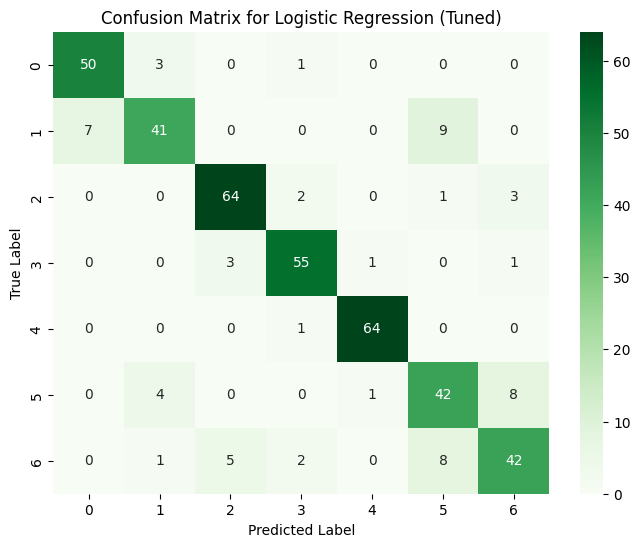

In [273]:
# Training dan simpan model ke variabel khusus
for name, mp in models_tuned.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='accuracy')

    if name == "Random Forest":
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        rf_tuned = clf.best_estimator_
    else:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        if name == "SVM":
            svm_tuned = clf.best_estimator_
        elif name == "Logistic Regression":
            logreg_tuned = clf.best_estimator_

    print(f"\n--- Evaluation Report for {name} (Tuned) ---")
    print("Best Parameters:", clf.best_params_)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix for {name} (Tuned)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [274]:
import pickle

# Simpan scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Simpan nama kolom fitur
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

# Simpan model default
pickle.dump(models["Random Forest"], open("rf_default.sav", "wb"))
pickle.dump(models["SVM"], open("svm_default.sav", "wb"))
pickle.dump(models["Logistic Regression"], open("logreg_default.sav", "wb"))

# Simpan model hasil tuning (jika kamu pakai tuning)
pickle.dump(rf_tuned, open("rf_tuned.sav", "wb"))
pickle.dump(svm_tuned, open("svm_tuned.sav", "wb"))
pickle.dump(logreg_tuned, open("logreg_tuned.sav", "wb"))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

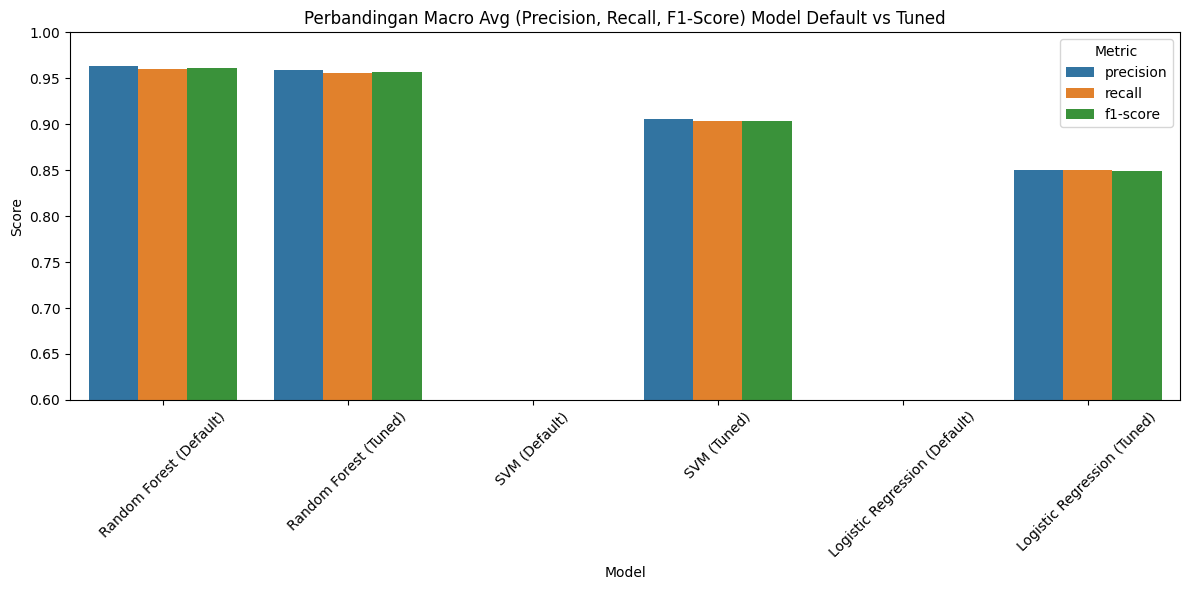

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Simpan classification_report (output_dict=True) dari model default dan tuned
# Gantilah bagian berikut dengan hasil evaluasi aslimu jika berbeda

report_default_rf = classification_report(y_test, rf_default.predict(X_test), output_dict=True)
report_tuned_rf = classification_report(y_test, rf_tuned.predict(X_test), output_dict=True)

report_default_svm = classification_report(y_test, svm_default.predict(X_test_scaled), output_dict=True)
report_tuned_svm = classification_report(y_test, svm_tuned.predict(X_test_scaled), output_dict=True)

report_default_logreg = classification_report(y_test, logreg_default.predict(X_test_scaled), output_dict=True)
report_tuned_logreg = classification_report(y_test, logreg_tuned.predict(X_test_scaled), output_dict=True)

# Gabungkan ke dictionary
model_reports = {
    "Random Forest (Default)": report_default_rf["macro avg"],
    "Random Forest (Tuned)": report_tuned_rf["macro avg"],
    "SVM (Default)": report_default_svm["macro avg"],
    "SVM (Tuned)": report_tuned_svm["macro avg"],
    "Logistic Regression (Default)": report_default_logreg["macro avg"],
    "Logistic Regression (Tuned)": report_tuned_logreg["macro avg"]
}

# Ubah ke dataframe untuk visualisasi
summary_data = []
for model, metrics in model_reports.items():
    for metric_name in ["precision", "recall", "f1-score"]:
        summary_data.append({
            "Model": model,
            "Metric": metric_name,
            "Score": metrics[metric_name]
        })

df_metrics = pd.DataFrame(summary_data)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=df_metrics, x="Model", y="Score", hue="Metric")
plt.title("Perbandingan Macro Avg (Precision, Recall, F1-Score) Model Default vs Tuned")
plt.xticks(rotation=45)
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()
